### Default Payments of Credit Card Clients in Taiwan from 2005

To DO:
Perform Exploratory data analysis on the dataset to identify potential important attributes for Credit Card Defaulters. Comment the observation- 
    - Business context
    - Data Science Context - what further actions should be taken to build a good predictive model.
Compare statistically the previous amount payment  for 6 months separately and also the 6 months bill amout separately and comment the observation.
Build a predictive model using following techniques - 
    Logistic regression
    Decision tree
    Random forest
    Naive Bayes
    Adaboost
    GradientBoosting
    XGBoost

Compare the performance using appropriate metrics, comment on selection of the metrics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load Data
df = pd.read_csv(r"C:\Users\SPK\Desktop\python\default of credit card clients1.csv",sep=";")
df.shape

(30000, 25)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
## check missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Data Exploration

### Credit card limit Vs Default Payment

In [8]:
# explore limits a little

df['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

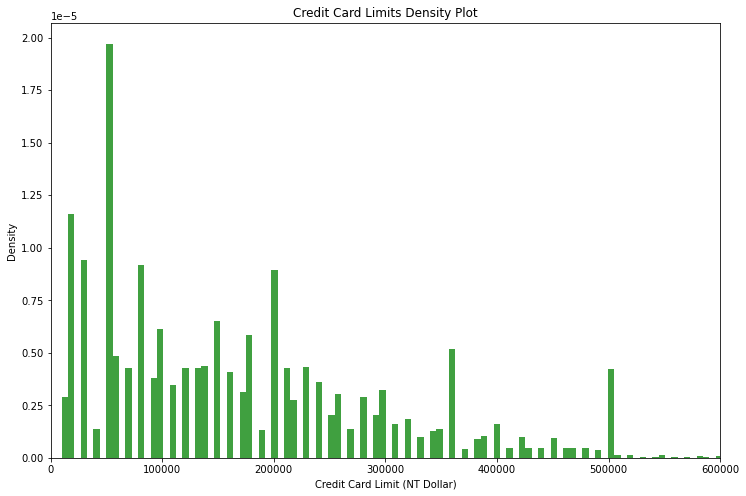

In [9]:
# see the density plot
plt.figure(figsize=(12, 8))
plt.title('Credit Card Limits Density Plot')
plt.xlabel('Credit Card Limit (NT Dollar)')
plt.ylabel('Density')
plt.xlim([0, 600000])
plt.hist(df['LIMIT_BAL'], bins=174, density=True, color='green', histtype='stepfilled', alpha=0.75)
plt.show()

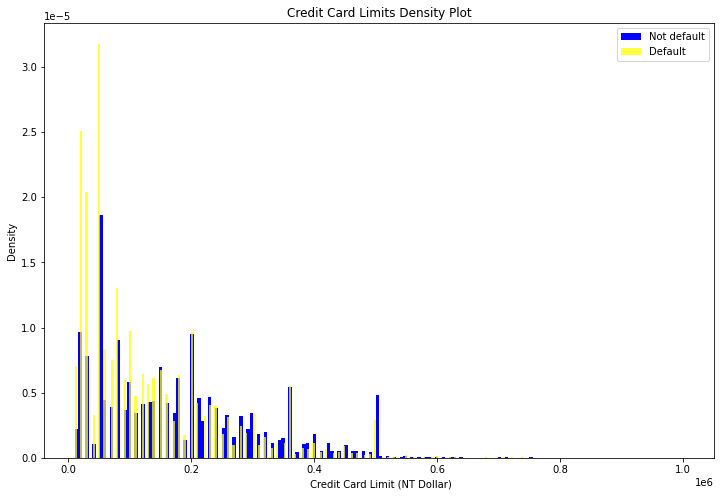

In [39]:
# Compare the default payment next month by credit card limit

non_default = df.loc[df['default payment next month'] == 0]['LIMIT_BAL']
default = df.loc[df['default payment next month'] == 1]['LIMIT_BAL']

# Plot these two group and the correlation between credit card limit and defaoult payment

plt.figure(figsize=(12, 8))
plt.title('Credit Card Limits Density Plot')
plt.xlabel(' Credit Card Limit (NT Dollar)')
plt.ylabel('Density')
plt.hist(non_default, bins=174, density=True,
         color='blue', alpha=1, label='Not default')
plt.hist(default, bins=174, density=True,
         color='yellow', alpha=0.75, label='Default')
plt.legend(['Not default', 'Default'])
plt.show()

### Sex Vs Credit Limit
Male=1
Female=2

In [40]:
# Female to Male Ratio

df.SEX.value_counts()/len(df.SEX)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

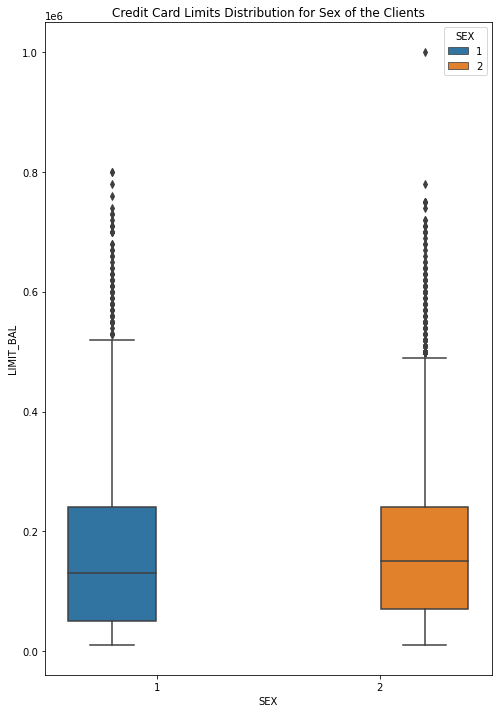

In [41]:
plt.figure(figsize=(8, 12))
plt.title('Credit Card Limits Distribution for Sex of the Clients')
sns.boxplot(x="SEX", y="LIMIT_BAL", data=df, hue='SEX')
plt.show()

### Sex Vs Default Payment

In [42]:
male = df.loc[df.SEX == 1]["default payment next month"].value_counts()
female = df.loc[df.SEX == 2]["default payment next month"].value_counts()
male

0    9015
1    2873
Name: default payment next month, dtype: int64

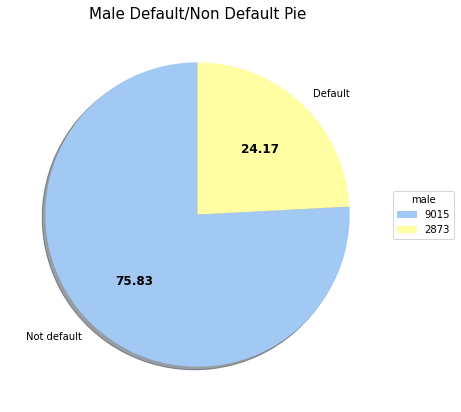

In [44]:
label = ['Not default', 'Default']
sns.set_color_codes(palette='pastel')
colors = ('b', 'y')
wp = {'linewidth': 1, 'edgecolor': "green"}
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(male,
                                  autopct='%.2f',
                                  labels=label,
                                  colors=colors,
                                  shadow=True,
                                  startangle=90,
                                  )

ax.legend(wedges, male,
          title="male",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
ax.set_title("Male Default/Non Default Pie", size=15)

plt.show()

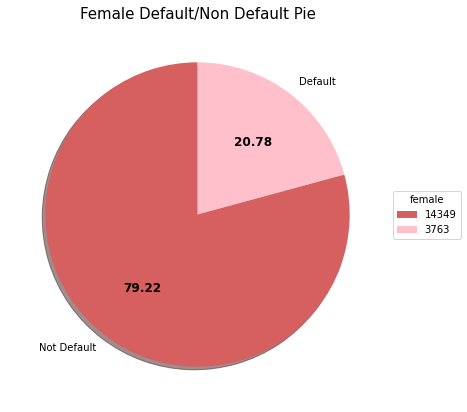

In [45]:
label = ['Not Default', 'Default']
sns.set_color_codes(palette='muted')
colors = ('r', 'pink')
wp = {'linewidth': 1, 'edgecolor': "green"}
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(female,
                                  autopct='%.2f',
                                  labels=label,
                                  colors=colors,
                                  shadow=True,
                                  startangle=90,
                                  )

ax.legend(wedges, female,
          title="female",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
ax.set_title("Female Default/Non Default Pie", size=15)

plt.show()



### Multiple Variable Comperison

In [16]:

# check the catogories of MARRIAGE again
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
# We will add category 0 to category 3

df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

# Now, we have only 3 categories.
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [18]:
# Original EDUCATION categories
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
edu = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[edu, 'EDUCATION'] = 4

# Revised EDUCATION categories
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [20]:
def boxplots(feature1, feature2, feature3, width=20):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 10))
    box = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                      data=df, palette="muted", showfliers=False)
    box.set_xticklabels(box.get_xticklabels(), rotation=0)
    plt.show()

### Marriage, Sex vs Credit Card Limit Balance

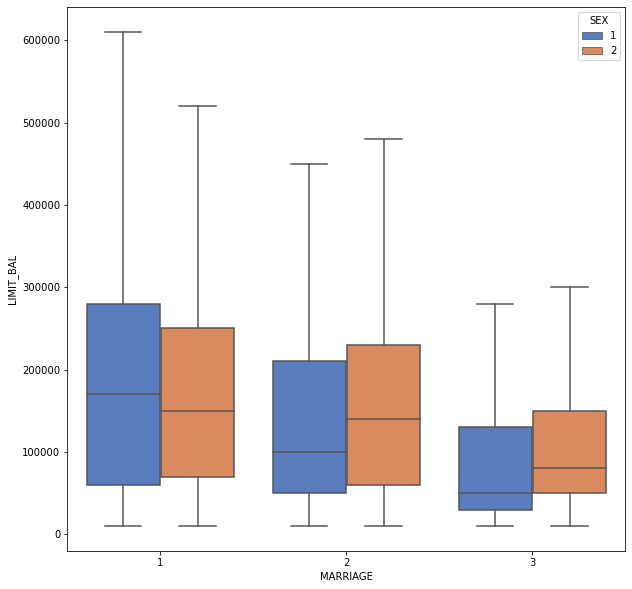

In [21]:

boxplots('MARRIAGE', 'LIMIT_BAL', 'SEX', 10)

### Marriage, Sex Vs Age

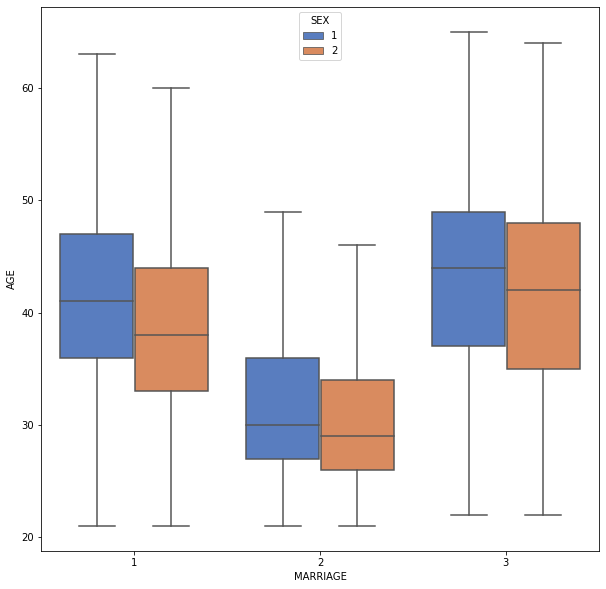

In [22]:
boxplots('MARRIAGE', 'AGE', 'SEX', 10)

### Education, Sex Vs Credit Card Limit Balance

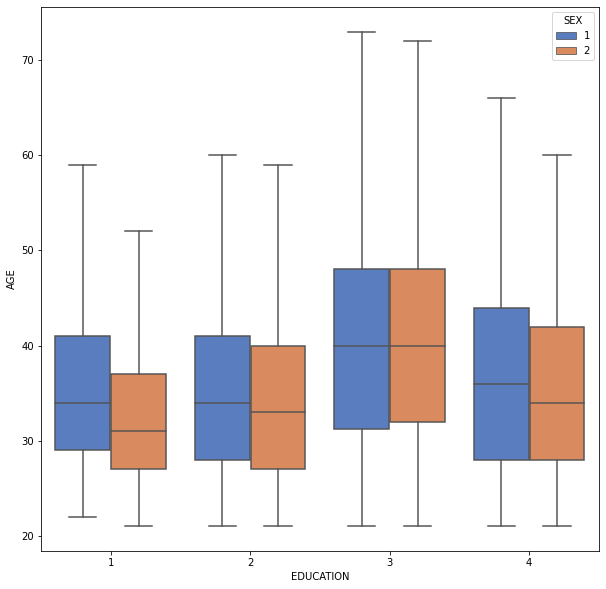

In [23]:
boxplots('EDUCATION', 'AGE', 'SEX', 10)

### Education, Marriage vs Credit card limit balance

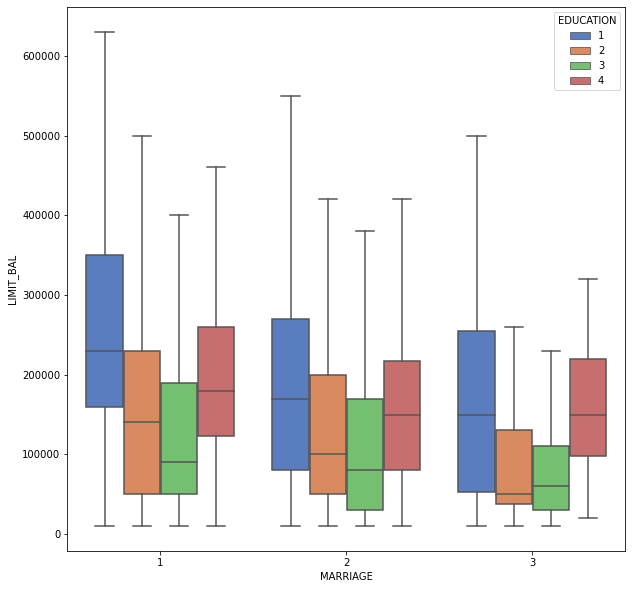

In [24]:
boxplots('MARRIAGE', 'LIMIT_BAL', 'EDUCATION', 10)

### Age, Sex vs Credit card limit

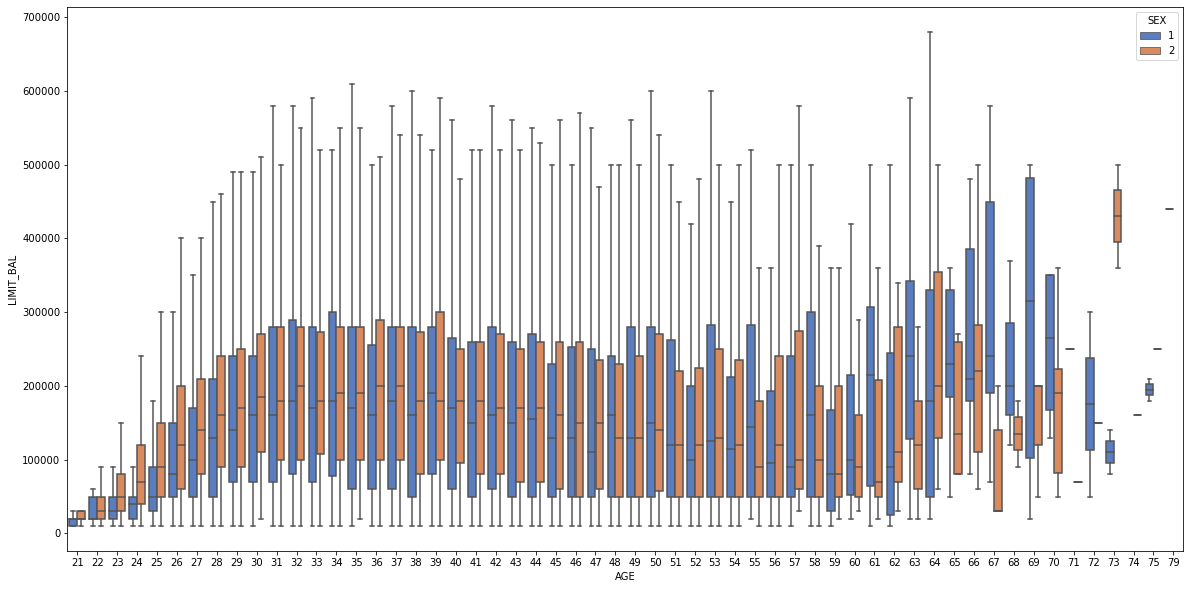

In [25]:


boxplots('AGE', 'LIMIT_BAL', 'SEX', 20)

### Repayment status variables

In [26]:
# Original Pay_0 value counts.
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [27]:
# Define a function to add -1,-2 into 0

def fullypaid(data, month):
    a = (data[month] == -1) | (data[month] == -2)
    data.loc[a, month] = 0
    return data[month].value_counts()

In [28]:
# Let apply our function to all payment status columns

allpayments = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

allpayments = [fullypaid(df, allpayment) for allpayment in allpayments]

Text(0.5, 1.0, 'Correlation between Payment Status Features')

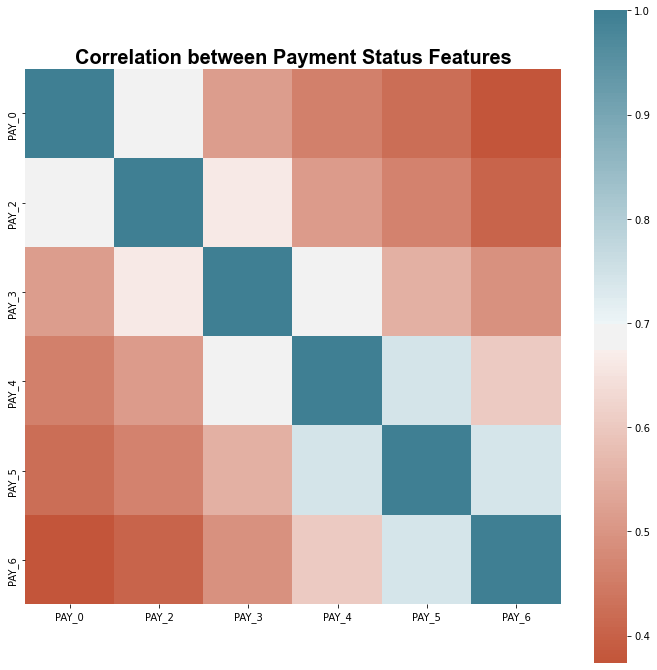

In [29]:
revised_allpayments = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(12, 12))
corr = df[revised_allpayments].corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(20, 220, n=200),
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            square=True,
            )
plt.title('Correlation between Payment Status Features', fontdict=font)

Text(0.5, 1.0, 'Correlation between Amount of Bill Statement in Months')

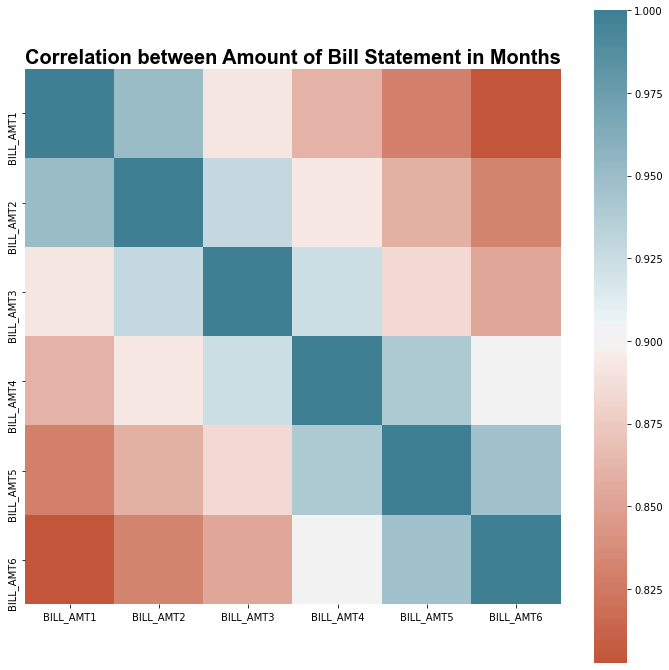

In [30]:
bill_amonths = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(12, 12))
corr = df[bill_amonths].corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(20, 220, n=200),
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            square=True,
            )
plt.title('Correlation between Amount of Bill Statement in Months', fontdict=font)

Text(0.5, 1.0, 'Correlation between Amount of Previous Payments')

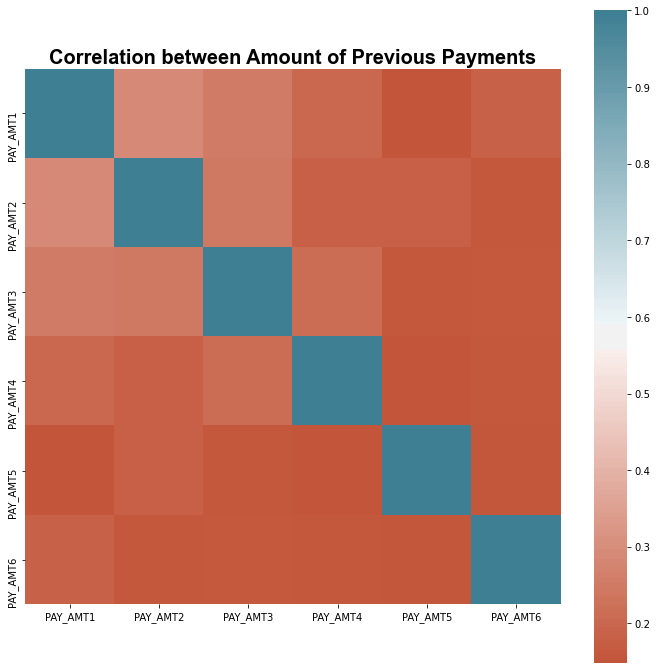

In [31]:
prev_payments = ['PAY_AMT1', 'PAY_AMT2',
                 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(12, 12))
corr = df[prev_payments].corr()
sns.heatmap(corr,
            cmap=sns.diverging_palette(20, 220, n=200),
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            square=True,
            )
plt.title('Correlation between Amount of Previous Payments', fontdict=font)

## Model prediction

In [46]:
# Setting up predictor features

X = df.drop(['default payment next month', 'ID'], axis=1)
X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [47]:
# Setting up target value

y = df['default payment next month'].copy()
y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [53]:
# Training and Test Datasets

# importinh libraries for splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

Logistic Regression Classfier

In [54]:
# importing library for Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logg = LogisticRegression()

# Fit the model on the trainng data.
logg.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('The accuary score for our model is: {0:.2f}'.format(
    accuracy_score(logg.predict(X_test), y_test)))

The accuary score for our model is: 0.78


C:\Users\SPK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: -0.00001
Feature: 1, Score: -0.00001
Feature: 2, Score: -0.00001
Feature: 3, Score: -0.00001
Feature: 4, Score: -0.00019
Feature: 5, Score: 0.00001
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00001
Feature: 11, Score: -0.00001
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.00005
Feature: 18, Score: -0.00002
Feature: 19, Score: -0.00001
Feature: 20, Score: -0.00001
Feature: 21, Score: -0.00001
Feature: 22, Score: -0.00000


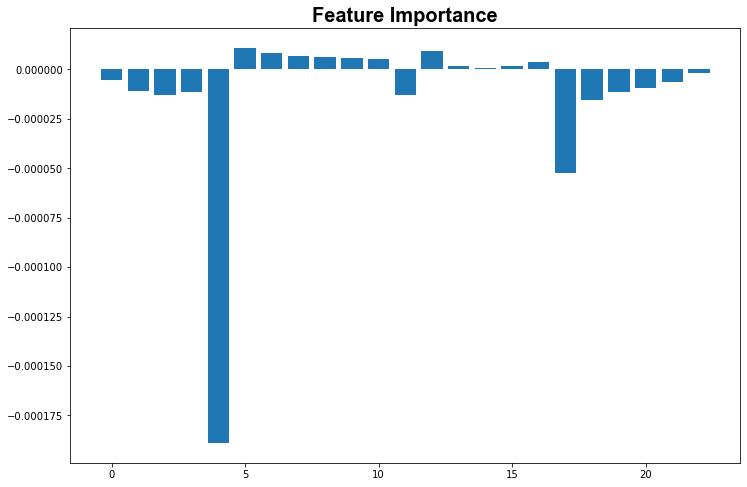

In [55]:
# get importance
importance = logg.coef_[0]

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
plt.figure(figsize=(12, 8))
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance', fontdict=font)
plt.show()

In [56]:
# importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,3.59,LIMIT_BAL
1,9.12,SEX
2,7.38,EDUCATION
3,6.39,MARRIAGE
4,11.29,AGE
5,2.47,PAY_0
6,3.04,PAY_2
7,2.89,PAY_3
8,3.31,PAY_4
9,3.56,PAY_5
